# Spectrogram Viewer
## Imports

In [1]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display as display
from tqdm import tqdm

## Load Audio Files

In [2]:
# Load in sample MP3 file
audio, sampling_rate = librosa.core.load("happy-birthday-8-bit.wav")

# Display audio file
print("Example Audio:")
display.display(display.Audio(audio, rate = sampling_rate))

Example Audio:


## Plot Waveforms (Amplitude vs. Time)

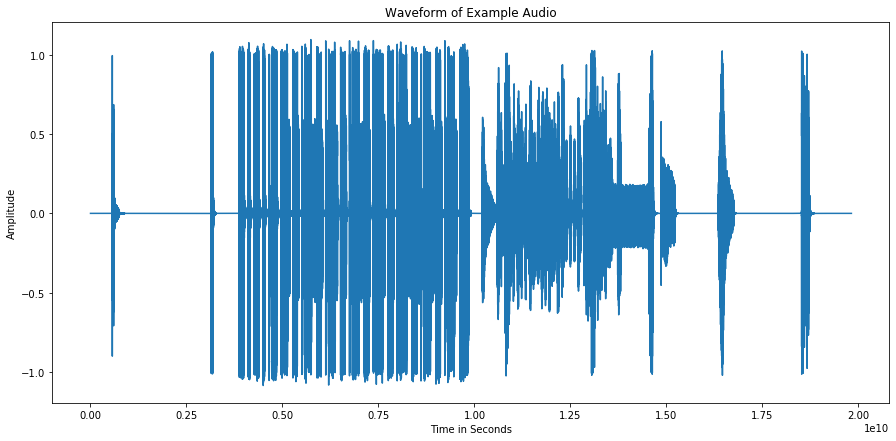

In [3]:
# Plot waveform as Amplitude vs. Time
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
ax.plot(np.arange(audio.shape[0])*sampling_rate, audio)
ax.set_xlabel("Time in Seconds")
ax.set_ylabel("Amplitude")
ax.set_title("Waveform of Example Audio")

plt.show()

## Plot Spectrograms (Frequency, Time, and Amplitude Data)

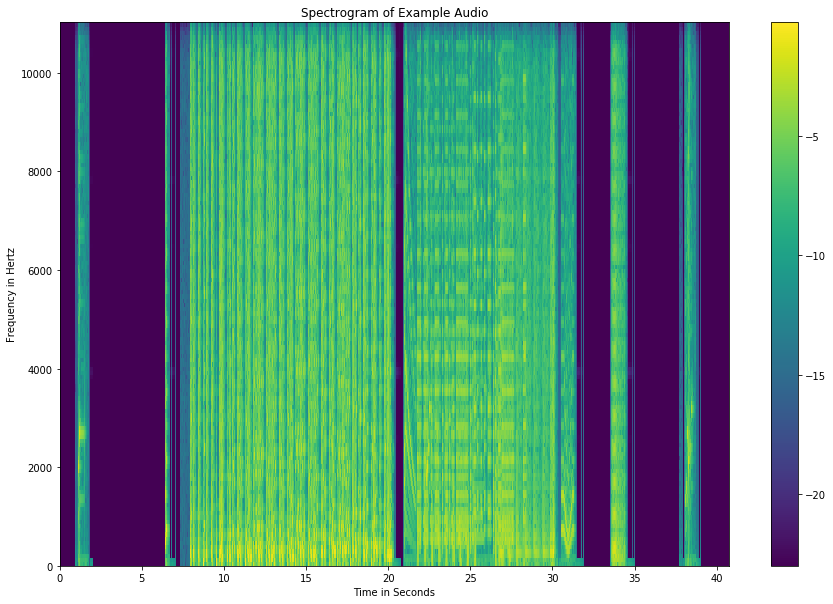

In [4]:
# Plot waveform spectrogram
freqs, times, spectrogram = signal.stft(audio, sampling_rate)
# We will have to take the log of the absolute value of the spectrogram in order to look at magnitude.
#  Taking the absolute value removes information about phase, which isn't too important to us right now.
#  Taking the log just adds contrast to our image. We wouldn't see any colors if we didn't do that.
#  We also add 1e-10 so that we don't happen to take the log of 0.
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
spectrogram_graph = ax.pcolormesh(times, freqs, np.log(np.abs(spectrogram) + 1e-10))
plt.colorbar(spectrogram_graph, ax = ax)
ax.set_xlabel("Time in Seconds")
ax.set_ylabel("Frequency in Hertz")
ax.set_title("Spectrogram of Example Audio")

plt.show()

In [5]:
reverse_spectrogram = [[0 for j in range(len(freqs))] for i in range(len(times))]
for i, freq in enumerate(spectrogram):
    for j, amp in enumerate(freq):
        reverse_spectrogram[j][i] = spectrogram[i][j]

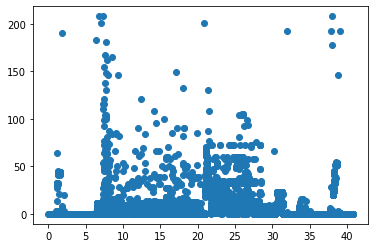

In [6]:
plt.scatter(times, [np.power(time.index(max(time)), 1.1)  for time in reverse_spectrogram])
plt.show()

In [20]:
reverse_spectrogram = np.array(reverse_spectrogram)

In [24]:
type(reverse_spectrogram)

numpy.ndarray